# Gumbel integral 
In this notebook we present an efficient way of evaluating the gumbel integral using results from Fog https://www.tandfonline.com/doi/abs/10.1080/03610910701790236


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
import sys
import os

sys.path.append('../cmc/')
from methods import *

In [2]:
# Toy example
seed = 0
N = 20000000     # population size
n = 10000     # sample size
random.seed(seed)

w = np.linspace(0.1,1000,N)    # weights 
w1 = w/max(w)
w2 = w/sum(w)
#s = random.sample(list(np.arange(N)),n)   # sample indexed  

In [3]:
s = np.arange(N)[10:n+10]
sc = list(set(np.arange(N))-set(s))       # remaining indexes
d = sum(w1[sc])    # weight sum of S complement

print('Population size is {}, sample size is {}, sample weight sum is {:.12f}.'.format(N,n,(sum(w1)-d)/sum(w1)))

Population size is 20000000, sample size is 10000, sample weight sum is 0.000000350415.


In [4]:
mw = mwnchypg(verbose=True)
# _,_ = mw.direct_integral(w, s)
logscale=0

In [6]:
# _,_ = mw.transformed_integral(w, s)

In [5]:
res = mw.laplace_approx(w2, s)

Laplace's method
-------------------------
Log-scaled result: -9497.153642782996


In [6]:
res = mw.laplace_approx(w1, s)

Laplace's method
-------------------------
Log-scaled result: -9497.153642782989


scaling parameter: 0.0014426510285759026
Showing logscaled integrand with base 20000000


C:\Users\16266\anaconda3\envs\cmc\lib\site-packages\numpy\lib\scimath.py:386: RuntimeWarning: divide by zero encountered in log
  return nx.log(x)/nx.log(n)


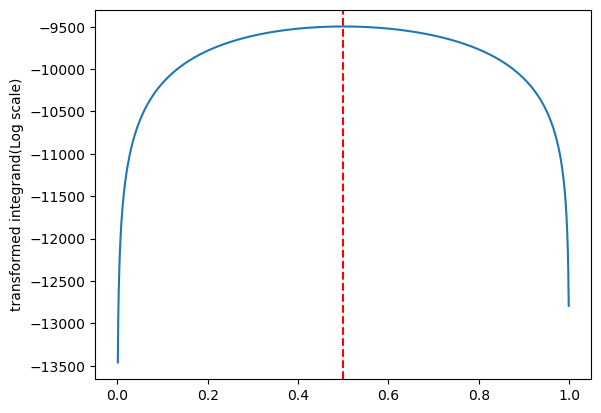

The reciprocal of d is 9.999003603790084e-08, note if the value is too large, Laplace method is generally not recommended.


In [7]:
mw.check_shape(w1, s)